## N-Way M-Shot Learning with Siamese Network

Compare new imgages by a network trained with M examples per class for N classes


In [1]:
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path

import cv2
import pandas as pd
import csv

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.preprocessing import LabelBinarizer


import tensorflow.keras.backend as K

import tensorflow.keras as keras

import time
import seaborn as sns

from skimage import io
import numpy as np
from numpy import genfromtxt

import numpy.random as rng
from sklearn.utils import shuffle

import pydicom as dicom

%matplotlib inline

In [2]:
%load_ext autoreload
%autoreload
%reload_ext autoreload

project_dir = Path(os.getcwd()).parent
project_dir
data_dir = os.path.join(project_dir, 'data')
images_dir = os.path.join(data_dir, 'images')
src_dir = os.path.join(project_dir, 'src')
models_dir = os.path.join(project_dir, 'models')
sys.path.insert(0, src_dir)

In [8]:
json_path = os.path.join(src_dir, 'mri-images.json')
print(json_path)
tdf = pd.read_json(json_path, orient='index')
tdf

/Users/norbiorb/Data/git/propulsion/FinalProject/floydhub/mri-classifier/src/mri-images.json


,patient-id,perspective,sequence,perspective-sequence,labels,image-number,image-name
0,TCGA120616,AX,ADC,AX-ADC,"[AX, ADC]",1,AX_ADC_Glioma_GBM_TCGA120616_1.jpg
1,TCGA120616,AX,ADC,AX-ADC,"[AX, ADC]",2,AX_ADC_Glioma_GBM_TCGA120616_2.jpg
2,TCGA764934,AX,ADC,AX-ADC,"[AX, ADC]",1,AX_ADC_Glioma_GBM_TCGA764934_1.jpg
3,TCGA764934,AX,ADC,AX-ADC,"[AX, ADC]",2,AX_ADC_Glioma_GBM_TCGA764934_2.jpg
4,TCGA766661,AX,ADC,AX-ADC,"[AX, ADC]",1,AX_ADC_Glioma_GBM_TCGA766661_1.jpg
...,...,...,...,...,...,...,...
404,TCGA766661,SAG,T1,SAG-T1,"[SAG, T1]",4,SAG_T1_Glioma_GBM_TCGA766661_4.jpg
405,TCGA766663,SAG,T1,SAG-T1,"[SAG, T1]",1,SAG_T1_Glioma_GBM_TCGA766663_1.jpg
406,TCGA766663,SAG,T1,SAG-T1,"[SAG, T1]",2,SAG_T1_Glioma_GBM_TCGA766663_2.jpg
407,TCGA766664,SAG,T1,SAG-T1,"[SAG, T1]",1,SAG_T1_Glioma_GBM_TCGA766664_1.jpg


In [5]:
from cnn_helper import *
tdf = load_json_as_df(src_dir, 'mri-images')

loaded mri-images.json with shape (0, 7)



In [9]:
siam_model_path = os.path.join(models_dir, 'resnet50_siamese_binary_crossentropy_120.h5')
embedding_model_path = os.path.join(models_dir, 'resnet50_siamese_base_network_120.h5')
siam_model = keras.models.load_model(siam_model_path)

OSError: SavedModel file does not exist at: /Users/norbiorb/Data/git/propulsion/FinalProject/floydhub/mri-classifier/models/resnet50_siamese_binary_crossentropy_120.h5/{saved_model.pbtxt|saved_model.pb}

In [106]:
embedding_model = keras.models.load_model(embedding_model_path)

In [68]:
siam_model.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
input_7 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
model_4 (Functional)            (None, 128)          23849984    input_6[0][0]                    
                                                                 input_7[0][0]                    
__________________________________________________________________________________________________
lambda_1 (Lambda)               (None, 128)          0           model_4[0][0]              

In [113]:
siam_model.layers[0:2]

In [28]:
# n way one shot learning takes n images and compares their distances in the embedding space
def n_way_one_shot_prediction(model, df, image_name, n, image_size):
    other_image_names = df.sample(n)['image-name']
    print(other_image_names)
    other_images = load_image(images_dir, other_image_names, image_size)
    image = load_image(images_dir, image_name, image_size)
    pairs = [[image, other_image] for other_image in other_images]
    preds = model.predict(pairs)
    return other_image_names, preds

In [128]:
def load_image(images_dir, image_names, image_size):
    images = []
    for name in image_names:
        image_path = os.path.join(images_dir, name)
        image = cv2.imread(image_path)
        image = cv2.resize(image, image_size)
        image = image/255
        tf.cast(image, tf.float32)
        images.append(image)
    return np.array(images)

In [ ]:
def dcim_path = os.path.join()
def load_dcim()

In [82]:
test_image_names = tdf['image-name']
test_image_classes = tdf['perspective']
unique_names = set(test_image_names)
len(unique_names)
test_images = load_image(images_dir, unique_names, image_size)

In [84]:
embedding_preds = embedding_model.predict(test_images)

In [86]:
vecs_filename = 'siamese_vecs_10.tsv'
meta_filename = 'siamese_meta_with_name_10.tsv'

np.savetxt(vecs_filename, embedding_preds, delimiter='\t')

out_m = open(meta_filename, 'w', encoding='utf-8')
for name in unique_names:
    out_m.write(f'{str(name)} \n')
out_m.close()

### Predict image by finding closest class representants

* Take an image
* Sample k random representants from the train data images 
* Find the closest representants and evaluate their classes

In [619]:
dcim_dir = os.path.join(Path(project_dir).parent, 'DCIM')
dcim_dir

'/Users/norbiorb/Data/git/propulsion/FinalProject/DCIM'

In [621]:
f = PathSelector(dcim_dir)
display(f.accord)

Accordion(children=(SelectMultiple(options=(('[..]', '..'), ('[TCGA-02-0034]', 'TCGA-02-0034'), ('[TCGA-06-016…

In [622]:
f.file

In [623]:
ds = dicom.dcmread(f.file)

AttributeError: 'NoneType' object has no attribute 'read'

In [364]:
pixels = ds.pixel_array.astype(np.float32)

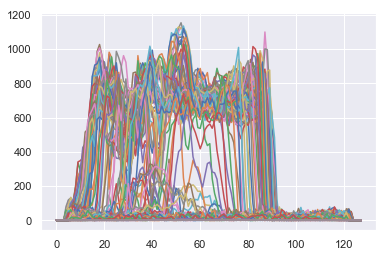

In [365]:
plt.plot(pixels)
plt.show()

In [503]:
from helper import * 
fpath = os.path.join(data_dir, 'temp.png')
dcm2png(f.file, fpath)
imgg = cv2.imread(fpath)
imgg = cv2.resize(imgg, image_size)
imgg.shape

(224, 224, 3)

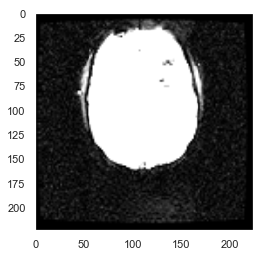

In [505]:
plt.grid(b=None)
plt.imshow(imgg)


### Representants of a class to compare with a new image

#### Random sampled representants

In [665]:
# take 3 representants per class
col = 'perspective'
s_df = sample_df(tdf, col, n_sample_per_class=3, replace = False)

In [666]:
s_df

,patient-id,perspective,sequence,perspective-sequence,labels,image-number,image-name
50,TCGA060121,AX,Misc,AX-Misc,"[AX, Misc]",2,AX_Misc_Glioma_GBM_TCGA060121_2.jpg
286,TCGA766664,SAG,T1KM,SAG-T1KM,"[SAG, T1KM]",1,SAG_T1KM_Glioma_GBM_TCGA766664_1.jpg
9,TCGA020034,SAG,T1KM,SAG-T1KM,"[SAG, T1KM]",1,SAG_T1KM_Glioma_GBM_TCGA020034_1.jpg
219,TCGA060189,AX,T1KM,AX-T1KM,"[AX, T1KM]",1,AX_T1KM_Glioma_GBM_TCGA060189_1.jpg
78,TCGA766662,COR,T1KM,COR-T1KM,"[COR, T1KM]",1,COR_T1KM_Glioma_GBM_TCGA766662_1.jpg
14,TCGA020047,COR,T1KM,COR-T1KM,"[COR, T1KM]",1,COR_T1KM_Glioma_GBM_TCGA020047_1.jpg
259,TCGA020046,SAG,T1KM,SAG-T1KM,"[SAG, T1KM]",1,SAG_T1KM_Glioma_GBM_TCGA020046_1.jpg
242,TCGA060173,AX,T1,AX-T1,"[AX, T1]",1,AX_T1_Glioma_GBM_TCGA060173_1.jpg
279,TCGA060121,COR,T1KM,COR-T1KM,"[COR, T1KM]",1,COR_T1KM_Glioma_GBM_TCGA060121_1.jpg


In [667]:
cls_representants = s_df['image-name'].values

In [543]:
def k_nearest(model, df, k, image, other_image_names, image_dir, image_size):
    other_images = load_image(images_dir, other_image_names, image_size)
    n = len(other_image_names)
    pred_dict = {
        other_image_names[i]: model.predict([image, tf.expand_dims(other_images[i,:,:], axis=0)]).flatten()[0] 
        for i in range(n)}
    
    pred_dict = {k: v for k, v in sorted(pred_dict.items(), key=lambda item: item[1], reverse=True)}
    return list(pred_dict.items())[0:k]

In [544]:
def k_nearest_from_image_name(model, df, k, image_name, other_image_names, image_dir, image_size):
    image = load_image(images_dir, image_name, image_size)
    return k_nearest(model, df, k, image, other_image_names, image_dir, image_size)

In [545]:
image_name = tdf.sample(1)['image-name']
image_name

65    AX_T2_Glioma_GBM_TCGA060173_1.jpg
Name: image-name, dtype: object

In [546]:
k = 5
nearest_preds = k_nearest_from_image_name(siam_model, tdf, k, image_name, cls_representants, images_dir, image_size)
nearest_preds

[('AX_T1_Glioma_GBM_TCGA060173_1.jpg', 0.93640435),
 ('AX_T1KM_Glioma_GBM_TCGA060189_1.jpg', 0.9322864),
 ('AX_Misc_Glioma_GBM_TCGA060121_2.jpg', 0.7958458),
 ('COR_T1KM_Glioma_GBM_TCGA766662_1.jpg', 0.0075767636),
 ('COR_T1KM_Glioma_GBM_TCGA020047_1.jpg', 0.0054441094)]

original


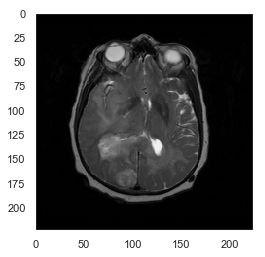

AX_T1_Glioma_GBM_TCGA060173_1.jpg: proba: 0.9364043474197388


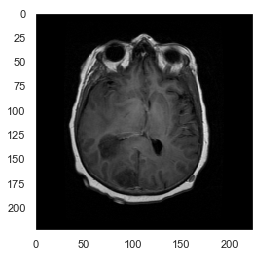

AX_T1KM_Glioma_GBM_TCGA060189_1.jpg: proba: 0.9322863817214966


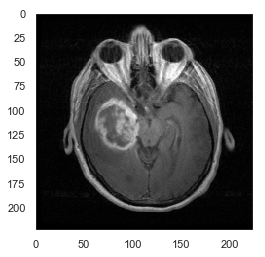

AX_Misc_Glioma_GBM_TCGA060121_2.jpg: proba: 0.7958458065986633


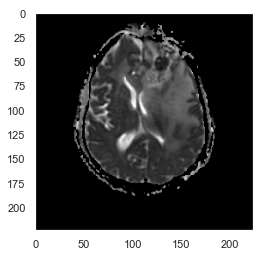

COR_T1KM_Glioma_GBM_TCGA766662_1.jpg: proba: 0.00757676362991333


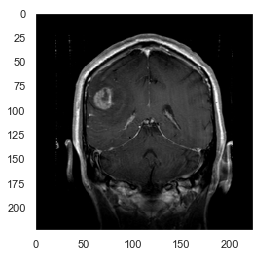

COR_T1KM_Glioma_GBM_TCGA020047_1.jpg: proba: 0.0054441094398498535


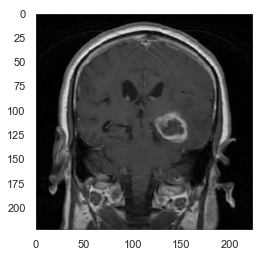

In [547]:
image = load_image(images_dir, image_name, image_size)

plt.grid(b=None)
print('original')
plt.imshow(image[0])
plt.show()
for name, proba in nearest_preds:
    imga = load_image(images_dir, [name], image_size)[0]
    plt.grid(b=None)
    print(f'{name}: proba: {proba}')
    plt.imshow(imga)
    plt.show()


## Predict dcim image

In [ ]:
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

In [553]:
# copy from https://stackoverflow.com/questions/48056345/jupyter-lab-browsing-the-remote-file-system-inside-a-notebook
import sys
import os
import ipywidgets as ui
from IPython.display import display

class PathSelector():

    def __init__(self,start_dir,select_file=True):
        self.file        = None 
        self.select_file = select_file
        self.cwd         = start_dir
        self.select      = ui.SelectMultiple(options=['init'],value=(),rows=10,description='') 
        self.accord      = ui.Accordion(children=[self.select]) 

        self.accord.selected_index = None # Start closed (showing path only)
        #self.refresh(self.cwd)
        self.refresh('.')
        self.select.observe(self.on_update,'value')

    def on_update(self,change):
        if len(change['new']) > 0:
            self.refresh(change['new'][0])

    def refresh(self,item):
        path = os.path.abspath(os.path.join(self.cwd,item))

        if os.path.isfile(path):
            if self.select_file:
                self.accord.set_title(0,path)  
                self.file = path
                self.accord.selected_index = None
            else:
                           self.select.value = ()

        else: # os.path.isdir(path)
            self.file = None 
            self.cwd  = path

            # Build list of files and dirs
            keys = ['[..]']; 
            for item in os.listdir(path):
                if item[0] == '.':
                    continue
                elif os.path.isdir(os.path.join(path,item)):
                    keys.append('['+item+']'); 
                else:
                    keys.append(item); 

            # Sort and create list of output values
            keys.sort(key=str.lower)
            vals = []
            for k in keys:
                if k[0] == '[':
                    vals.append(k[1:-1]) # strip off brackets
                else:
                    vals.append(k)
                            # Update widget
            self.accord.set_title(0,path)  
            self.select.options = list(zip(keys,vals)) 
            with self.select.hold_trait_notifications():
                self.select.value = ()



In [663]:
def load_dcim(dcim_path):
    fpath = os.path.join(data_dir, 'temp.png')
    dcm2png(dcim_path, fpath)
    image = cv2.imread(fpath)
    image = cv2.resize(image, image_size)
    image = image/255
    return image

def select_representants(n_sample_per_class, df, col):
    # take 3 representants per class
    col = 'perspective'
    s_df = sample_df(tdf, col, n_sample_per_class=n_sample_per_class, replace = False)
    return s_df['image-name'].values

def show_prediction_dcim(model, image, representants, df, k, images_dir, image_size ):
    #print(image)
    nearest_preds =  k_nearest(model, df, k, np.expand_dims(image, axis=0), representants, images_dir, image_size)
    plt.grid(b=None)
    print('original')
    plt.imshow(image)
    plt.show()
    for name, proba in nearest_preds2:
        imga = load_image(images_dir, [name], image_size)[0]
        plt.grid(b=None)
        print(f'{name}: proba: {proba}')
        plt.imshow(imga)
        plt.show()
    

def show_prediction(model, image, representants, df, k, images_dir, image_size ):
    #print(image)
    nearest_preds = k_nearest_from_image_name(siam_model, tdf, k, image_name, cls_representants, images_dir, image_size)
    plt.grid(b=None)
    print('original')
    plt.imshow(image)
    plt.show()
    for name, proba in nearest_preds2:
        imga = load_image(images_dir, [name], image_size)[0]
        plt.grid(b=None)
        print(f'{name}: proba: {proba}')
        plt.imshow(imga)
        plt.show()
 


### Select dcim file

In [670]:
f_dcim = PathSelector(dcim_dir)
display(f_dcim.accord)

Accordion(children=(SelectMultiple(options=(('[..]', '..'), ('[TCGA-02-0034]', 'TCGA-02-0034'), ('[TCGA-06-016…

In [671]:
f_dcim.file

'/Users/norbiorb/Data/git/propulsion/FinalProject/DCIM/TCGA-02-0034/07-27-1997-MRI BRAIN WWO CONTRAMR-39956/10.000000-AX T2 FSE-01030/1-03.dcm'

original


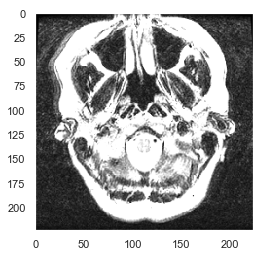

COR_T1KM_Glioma_GBM_TCGA020047_1.jpg: proba: 0.6406610012054443


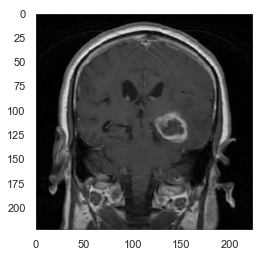

COR_T1KM_Glioma_GBM_TCGA766662_1.jpg: proba: 0.6252843737602234


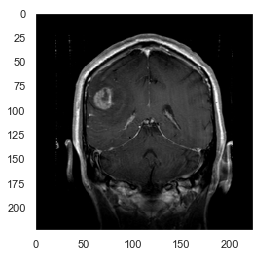

AX_Misc_Glioma_GBM_TCGA060121_2.jpg: proba: 0.27266398072242737


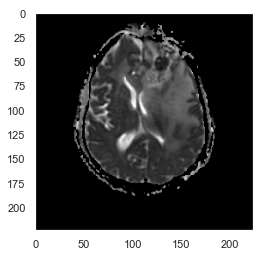

SAG_T1KM_Glioma_GBM_TCGA020046_1.jpg: proba: 0.17483696341514587


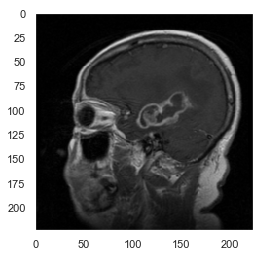

AX_T1KM_Glioma_GBM_TCGA060189_1.jpg: proba: 0.1616010069847107


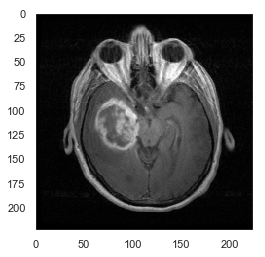

'\nif isDCIM(f.file):\n    show_prediction_dcim(siam_model, load_dcim(f.file), representants, tdf, k, images_dir, image_size)\nelse:\n    img = cv2.imread(f.file)\n    show_prediction(siam_model, img, representants, tdf, k, images_dir, image_size)\n'

In [672]:
n_sample_per_class = 3
k=9
col = 'perspective'
representants = select_representants(n_sample_per_class, tdf, col)
show_prediction_dcim(siam_model, load_dcim(f_dcim.file), representants, tdf, k, images_dir, image_size)

"""
if isDCIM(f.file):
    show_prediction_dcim(siam_model, load_dcim(f.file), representants, tdf, k, images_dir, image_size)
else:
    img = cv2.imread(f.file)
    show_prediction(siam_model, img, representants, tdf, k, images_dir, image_size)
"""

In [660]:
f= PathSelector(images_dir)
display(f.accord)

Accordion(children=(SelectMultiple(options=(('[..]', '..'), ('AX_ADC_Glioma_GBM_TCGA120616_1.jpg', 'AX_ADC_Gli…

In [661]:
f.file

'/Users/norbiorb/Data/git/propulsion/FinalProject/mri-classifier/data/images/AX_ADC_Glioma_GBM_TCGA120616_1.jpg'

original


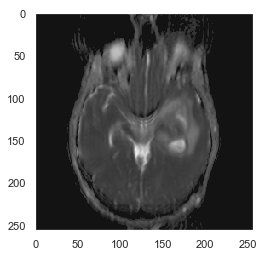

COR_T1KM_Glioma_GBM_TCGA020047_1.jpg: proba: 0.6406610012054443


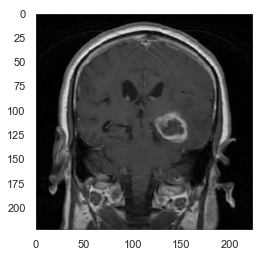

COR_T1KM_Glioma_GBM_TCGA766662_1.jpg: proba: 0.6252843737602234


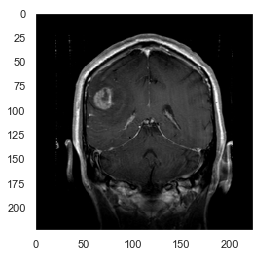

AX_Misc_Glioma_GBM_TCGA060121_2.jpg: proba: 0.27266398072242737


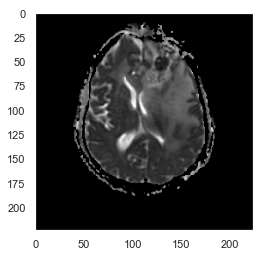

SAG_T1KM_Glioma_GBM_TCGA020046_1.jpg: proba: 0.17483696341514587


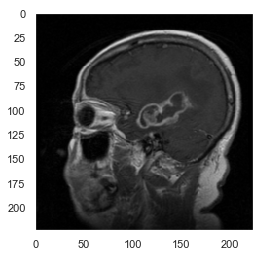

AX_T1KM_Glioma_GBM_TCGA060189_1.jpg: proba: 0.1616010069847107


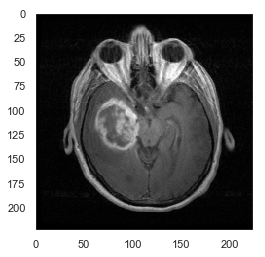

In [664]:
img = cv2.imread(f.file)
show_prediction(siam_model, img, representants, tdf, k, images_dir, image_size)

## Perspective-Sequence trained net

#### Gaussian Mixture to sample representants

In [586]:
siam_model_path2 = os.path.join(models_dir, 'resnet50_siamese_binary_crossentropy_40_56_perspective_sequence.h5')
embedding_model_path2 = os.path.join(models_dir, 'resnet50_siamese_base_network_40_56_perspective_sequence.h5')
siam_model2 = keras.models.load_model(siam_model_path2)

In [598]:
col = 'perspective-sequence'
tdf[col] = tdf[col].apply(lambda x: x.strip())
tdf[col].unique()
classes_df = tdf.groupby(by=[col])
available_classes = set(classes_df.groups.keys())
available_classes

{'AX-ADC',
 'AX-DWI',
 'AX-MRA',
 'AX-Misc',
 'AX-PD',
 'AX-PWI',
 'AX-T1',
 'AX-T1KM',
 'AX-T2',
 'AX-T2KM',
 'COR-Misc',
 'COR-T1KM',
 'COR-T2',
 'SAG-T1',
 'SAG-T1KM'}

In [607]:
test_image_classes2 = tdf['perspective-sequence']
unique_persp_seq_classes = set(test_image_classes2.unique())
unique_persp_seq_classes

{'AX-ADC',
 'AX-DWI',
 'AX-MRA',
 'AX-Misc',
 'AX-PD',
 'AX-PWI',
 'AX-T1',
 'AX-T1KM',
 'AX-T2',
 'AX-T2KM',
 'COR-Misc',
 'COR-T1KM',
 'COR-T2',
 'SAG-T1',
 'SAG-T1KM'}

In [610]:
type(unique_persp_seq_classes)

set

In [611]:
test_image_labels = tdf['labels']
for name in test_image_labels:
    print(name)

['AX', 'PWI']
['AX', 'ADC']
['COR', 'T1KM']
['COR', 'T1KM']
['AX', 'DWI']
['AX', 'T2']
['AX', 'T2']
['AX', 'DWI']
['COR', 'T1KM']
['SAG', 'T1KM']
['AX', 'DWI']
['COR', 'T1KM']
['AX', 'PWI']
['AX', 'PWI']
['COR', 'T1KM']
['COR', 'T1KM ']
['SAG', 'T1KM']
['SAG', 'T1KM ']
['AX', 'ADC']
['COR', 'T1KM']
['AX', 'T1 ']
['AX', 'DWI']
['SAG', 'T1']
['COR', 'T1KM']
['AX', 'DWI']
['AX', 'DWI']
['AX', 'T1']
['SAG', 'T1']
['AX', 'PWI']
['COR', 'T1KM']
['AX', 'T2']
['AX', 'DWI']
['AX', 'ADC']
['COR', 'T1KM ']
['AX', 'T1']
['AX', 'T1']
['SAG', 'T1']
['AX', 'T2']
['AX', 'T1KM']
['SAG', 'T1']
['AX', 'T2']
['COR', 'T1KM']
['AX', 'T1KM']
['AX', 'T2']
['AX', 'T1KM']
['SAG', 'T1KM']
['AX', 'T2KM']
['AX', 'DWI']
['SAG', 'T1']
['AX', 'T2']
['AX', 'Misc']
['COR', 'T1KM']
['AX', 'T2']
['AX', 'T1KM']
['AX', 'T1']
['SAG', 'T1KM ']
['AX', 'T2']
['AX', 'T1']
['SAG', 'T1']
['COR', 'T1KM']
['SAG', 'T1']
['COR', 'T1KM']
['AX', 'T2']
['AX', 'DWI']
['AX', 'T2']
['AX', 'T2']
['COR', 'T1KM']
['AX', 'Misc']
['AX', 'T2']
[

In [587]:
embedding_model2 = keras.models.load_model(embedding_model_path2)

In [612]:
def get_embeddings(model, images, vecs_filename, meta_filename):
    embedding_preds = model.predict(images) 
    vecs_filename = f'{vecs_filename}.tsv'
    meta_filename = f'{meta_filename}.tsv'

    np.savetxt(vecs_filename, embedding_preds, delimiter='\t')

    out_m = open(meta_filename, 'w', encoding='utf-8')
    for name in unique_names:
        out_m.write(f'{str(name)} \n')
    out_m.close()
    return embedding_preds

def download_embeddings(embedding_preds, vecs_filename, meta_filename):
    vecs_filename = f'{vecs_filename}.tsv'
    meta_filename = f'{meta_filename}.tsv'

    np.savetxt(vecs_filename, embedding_preds, delimiter='\t')

    out_m = open(meta_filename, 'w', encoding='utf-8')
    for name in test_image_labels:
        out_m.write(f'{str(name)} \n')
    out_m.close()

In [591]:
#embeddings2 = get_embeddings(embedding_model2, test_images, 'vecs_persp_seq', 'meta_persp_seq')

NameError: name 'unique_labels' is not defined

In [613]:
download_embeddings(embeddings2, 'vecs_persp_seq', 'meta_persp_seq_labels')

In [676]:
import numpy as np
from sklearn.mixture import GaussianMixture, BayesianGaussianMixture
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [809]:
embedding_preds2 = embedding_model2.predict(test_images)

In [810]:
num_classes = len(unique_persp_seq_classes)
bgmm = BayesianGaussianMixture(n_components=num_classes)
fitted = bgmm.fit(embedding_preds2)

In [811]:
lll = list(unique_persp_seq_classes)
lll[0]

'AX-ADC'

In [813]:
def create_jury(bgmm, num_members, cls):
    jury = dict()
    
    for i in range(num_members+1):        
        sample_representants, sample_cls = bgmm.sample(len(cls) * num_members)   

        for i, cl in enumerate(np.array(sample_cls)):
            cl_name = cls[cl]
            if cl_name in jury.keys():
                cl_jury = jury[cl_name]
                if len(cl_jury) < num_members:
                    cl_jury.append(sample_representants[i])

                 
            else:
                cl_jury = [sample_representants[i]]
                jury[cl_name] = cl_jury
                
    return jury
    


                            

In [814]:
persp_seq_jury = create_jury(bgmm, 3, list(unique_persp_seq_classes))

In [815]:
list(persp_seq_jury.keys())

['AX-T1KM',
 'AX-T2KM',
 'COR-T1KM',
 'SAG-T1KM',
 'AX-DWI',
 'AX-MRA',
 'AX-T2',
 'SAG-T1',
 'COR-T2',
 'COR-Misc',
 'AX-T1',
 'AX-PD',
 'AX-Misc',
 'AX-PWI',
 'AX-ADC']

In [816]:
#f_1= PathSelector(dcim_dir)
f_1= PathSelector(images_dir)
display(f_1.accord)

Accordion(children=(SelectMultiple(options=(('[..]', '..'), ('AX_ADC_Glioma_GBM_TCGA120616_1.jpg', 'AX_ADC_Gli…

In [888]:
f_1.file

'/Users/norbiorb/Data/git/propulsion/FinalProject/mri-classifier/data/images/AX_T1_Glioma_GBM_TCGA061084_1.jpg'

In [891]:
def load_img(image_path, image_size):
    image = cv2.imread(image_path)
    image = cv2.resize(image, image_size)
    image = image/255
    tf.cast(image, tf.float32)
    return image

#img11 = load_dcim(f_1.file)
img11 = load_img(f_1.file, image_size)

original


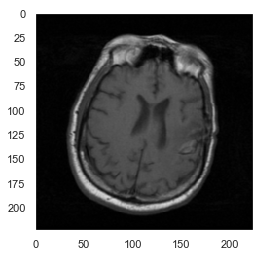

In [892]:
print('original')
plt.grid(b=None)
plt.imshow(img11)
plt.show()

In [875]:
def k_nearest_vecs(embedding_model, k, image, jury_dict):
    l1 = lambda t1, t2: tf.reduce_sum(tf.abs(t1 - t2))
    cos_similarity = lambda t1, t2: tf.reduce_sum(
        tf.multiply(
            tf.math.l2_normalize(t1.astype('float32')), tf.math.l2_normalize(t2.astype('float32'))
        )
    )
    image_embedding = embedding_model.predict(tf.expand_dims(image, axis=0))[0]
    pred_dict = {}
    avg_dict = {}
    for key in jury_dict.keys():
        jury = jury_dict[key]
        
        s = 0
        for i, j in enumerate(jury):
            s += l1(image_embedding, j)
            pred_dict[f'{key}_{i}'] = cos_similarity(image_embedding, j) 
   
        avg = s/len(jury_dict)
        avg_dict[key] = avg
        
    pred_dict = {k: v for k, v in sorted(pred_dict.items(), key=lambda item: item[1], reverse=True)}
    avg_dict = {k: v for k, v in sorted(avg_dict.items(), key=lambda item: item[1], reverse=True)}
    return avg_dict, pred_dict
    #return list(pred_dict.items())[0:k]




In [893]:
p, pd = k_nearest_vecs(embedding_model2, k, img11, persp_seq_jury)
p

{'AX-PWI': <tf.Tensor: shape=(), dtype=float64, numpy=20.367038348781527>,
 'COR-T1KM': <tf.Tensor: shape=(), dtype=float64, numpy=20.274343416774393>,
 'AX-T2': <tf.Tensor: shape=(), dtype=float64, numpy=18.57568055883093>,
 'AX-T1': <tf.Tensor: shape=(), dtype=float64, numpy=18.122293997532843>,
 'SAG-T1KM': <tf.Tensor: shape=(), dtype=float64, numpy=16.979416845749444>,
 'AX-ADC': <tf.Tensor: shape=(), dtype=float64, numpy=15.696149027890225>,
 'SAG-T1': <tf.Tensor: shape=(), dtype=float64, numpy=14.817831454000482>,
 'COR-T2': <tf.Tensor: shape=(), dtype=float64, numpy=12.873814303725831>,
 'AX-Misc': <tf.Tensor: shape=(), dtype=float64, numpy=10.390439795868112>,
 'AX-DWI': <tf.Tensor: shape=(), dtype=float64, numpy=9.776884408209755>,
 'AX-PD': <tf.Tensor: shape=(), dtype=float64, numpy=6.829665229001749>,
 'AX-T2KM': <tf.Tensor: shape=(), dtype=float64, numpy=6.0923055468396825>,
 'AX-MRA': <tf.Tensor: shape=(), dtype=float64, numpy=5.937837397137528>,
 'AX-T1KM': <tf.Tensor: sh

### gaussian with perspective classes

* Load Models
* Create embeddings
* Fit Gaussian Mixture Model
* Select Jury
* Predict


In [880]:
# models yet loaded: siam_model, embedding_model
# embeddings yet created: embedding_preds

# Gaussian Mixture
cls_perspectives = tdf['perspective'].unique()
num_classes = len(cls_perspectives)
#bgmm_perspective = BayesianGaussianMixture(n_components=num_classes)
bgmm_perspective = GaussianMixture(n_components=num_classes)
fitted_perspective = bgmm_perspective.fit(embedding_preds)


In [895]:
num_members = 120
jury_perspective = create_jury(bgmm_perspective, num_members, cls_perspectives)

In [894]:
p1, pd1 = k_nearest_vecs(embedding_model, k, img11, jury_perspective)
p1

{'COR': <tf.Tensor: shape=(), dtype=float64, numpy=7256.596541959742>,
 'AX': <tf.Tensor: shape=(), dtype=float64, numpy=3250.5798040234>,
 'SAG': <tf.Tensor: shape=(), dtype=float64, numpy=3119.4698069627407>}

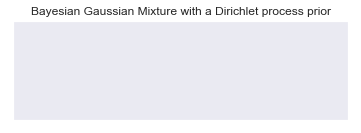